In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
! kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:04<00:00, 251MB/s]
100% 1.06G/1.06G [00:04<00:00, 278MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [9]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [12]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)      

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 51s 81ms/step - loss: 0.6343 - accuracy: 0.6427 - val_loss: 0.5403 - val_accuracy: 0.7308
Epoch 2/10
625/625 [==============================] - 50s 80ms/step - loss: 0.4857 - accuracy: 0.7603 - val_loss: 0.4784 - val_accuracy: 0.7718
Epoch 3/10
625/625 [==============================] - 51s 81ms/step - loss: 0.3737 - accuracy: 0.8277 - val_loss: 0.5500 - val_accuracy: 0.7728
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2446 - accuracy: 0.8960 - val_loss: 0.6774 - val_accuracy: 0.7870
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.1485 - accuracy: 0.9419 - val_loss: 0.9666 - val_accuracy: 0.7510
Epoch 6/10
625/625 [==============================] - 58s 93ms/step - loss: 0.0910 - accuracy: 0.9668 - val_loss: 1.2544 - val_accuracy: 0.7424
Epoch 7/10
625/625 [==============================] - 68s 107ms/step - loss: 0.0661 - accuracy: 0.9780 - val_loss: 1.2181 - val_accurac

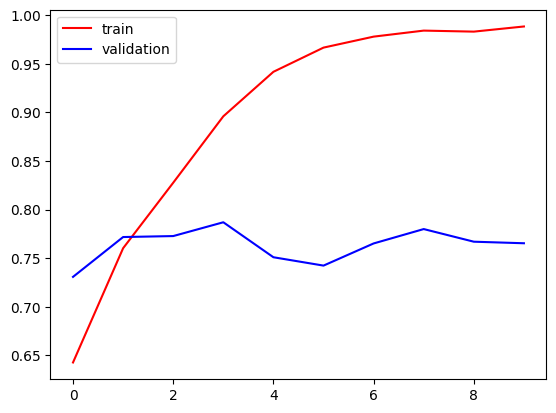

In [17]:
# Before batch normalization and droupout
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

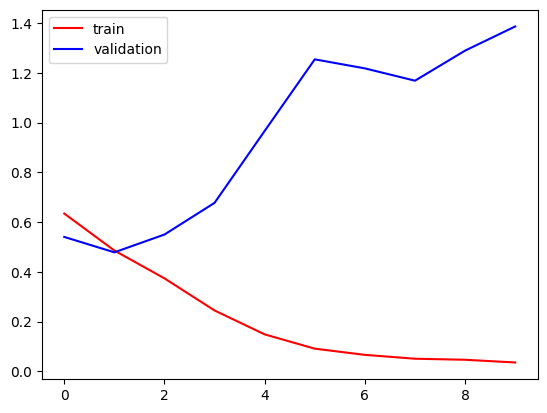

In [18]:
# Before batch normalization and droupout
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In above Model we see that,Model is Overfitted so, we have to use Some technique to tackle Overfitting

**ways to reduce overfitting**

* Add more data
* Data Augmentation
* L1/L2 Regularizer
* Dropout
* Batch Norm
* Reduce complexity

**we use Batch normalization and Dropout**

In [20]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [21]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 105ms/step - loss: 1.5703 - accuracy: 0.5648 - val_loss: 0.6988 - val_accuracy: 0.5988
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.6220 - accuracy: 0.6730 - val_loss: 0.5534 - val_accuracy: 0.7162
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5248 - accuracy: 0.7429 - val_loss: 0.7734 - val_accuracy: 0.5368
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4497 - accuracy: 0.7901 - val_loss: 0.4489 - val_accuracy: 0.7856
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3939 - accuracy: 0.8214 - val_loss: 0.4488 - val_accuracy: 0.7896
Epoch 6/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3353 - accuracy: 0.8519 - val_loss: 0.4588 - val_accuracy: 0.8064
Epoch 7/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2783 - accuracy: 0.8805 - val_loss: 0.4981 - val_ac

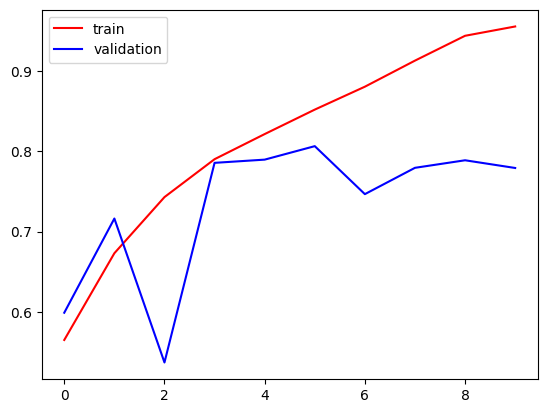

In [25]:
# After batch normalization
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

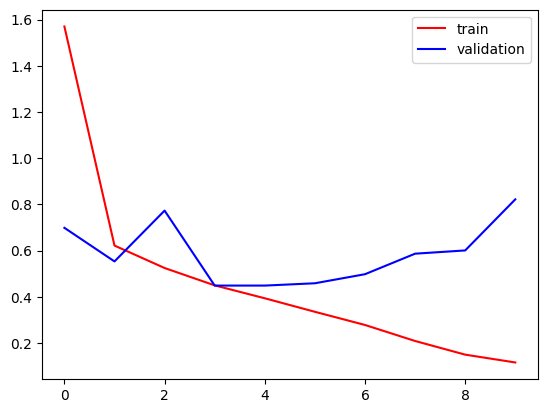

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# **Testing Model**

In [27]:
import cv2

In [34]:
test_img = cv2.imread('/content/Dog.jpg')


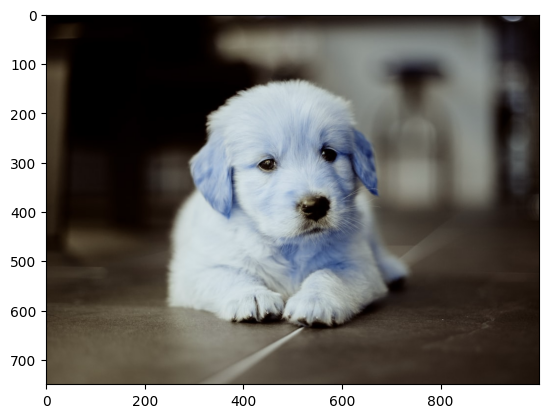

In [35]:
plt.imshow(test_img)

In [36]:
test_img.shape

(750, 1000, 3)

In [37]:
test_img = cv2.resize(test_img,(256,256))

In [38]:
test_input = test_img.reshape((1,256,256,3))

In [39]:
model.predict(test_input)

1/1 [==============================] - 0s 25ms/step


array([[1.]], dtype=float32)